In [18]:
#Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

In [19]:
df= pd.read_pickle('../datos/registrados/04-df_registrados_NO-norm.pickle')

In [20]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
0,2018-01-01,invierno,0,1,festivo,1,2,18.18125,80.5833,10.749882,654
1,2018-01-02,invierno,0,1,no festivo,2,2,17.68695,69.6087,16.652113,670
2,2018-01-03,invierno,0,1,no festivo,3,1,9.47025,43.7273,16.636703,1229
3,2018-01-04,invierno,0,1,no festivo,4,1,10.60610,59.0435,10.739832,1454
4,2018-01-05,invierno,0,1,no festivo,5,1,11.46350,43.6957,12.522300,1518


In [21]:
df.dtypes

dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday             category
weekday             category
weathersit          category
atemp                float64
hum                  float64
windspeed            float64
registered             int64
dtype: object

`Para poder codificar las variables categoricas vamos a ir analizando una a una para ver que metodo aplicaremos, segun tenga orden o no.`

---

### SEASON

In [22]:
# Realizamos un groupby que sume los registros de la columna registered por estacion.

estacion = df.groupby('season')['registered'].sum()
estacion= pd.DataFrame(estacion).reset_index()
estacion

,season,registered
0,invierno,408957
1,otoño,711831
2,primavera,715067
3,verano,835038


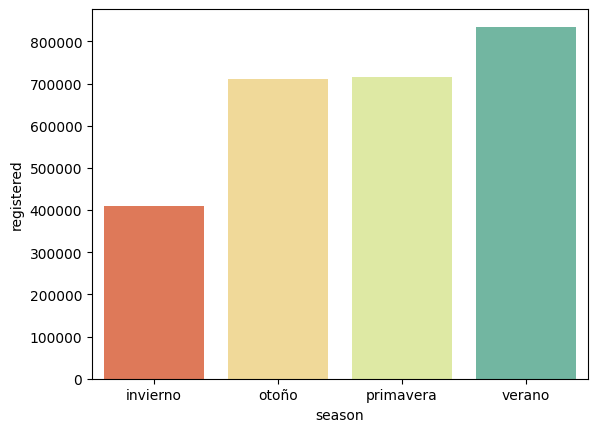

In [23]:
sns.barplot(
        data = estacion,
        x = 'season',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna season TIENE ORDEN, por lo que le daremos menor peso al invierno y mayor al verano`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`


In [24]:
mapa_season = {'invierno':0, 'primavera':1, 'otoño':1, 'verano':2} 

In [25]:
df['season'] = df['season'].map(mapa_season)

---

### HOLIDAY

In [26]:
holiday = df.groupby('holiday')['registered'].sum()
holiday = pd.DataFrame(holiday).reset_index()
holiday

,holiday,registered
0,festivo,53777
1,no festivo,2617116


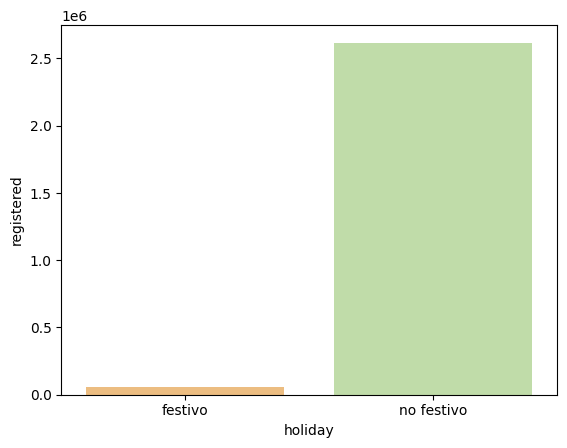

In [27]:
sns.barplot(
        data = holiday,
        x = 'holiday',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna holiday TIENE ORDEN, por lo que le daremos menor peso a festivos y mayor a no festivo`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [28]:
mapa_holiday = {'festivo':0, 'no festivo':1} 

In [29]:
df['holiday'] = df['holiday'].map(mapa_holiday)

In [30]:
df.sample(7)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
285,2018-10-13,1,0,10,1,6,2,27.59020,89.6667,9.499729,2623
709,2019-12-11,1,1,12,1,3,2,16.91815,59.6667,19.834479,5219
227,2018-08-16,2,0,8,1,4,1,32.29185,57.8333,15.834043,4004
47,2018-02-17,0,0,2,1,6,1,21.43290,50.5000,15.416968,2216
324,2018-11-21,1,0,11,1,3,3,22.25310,91.0000,9.249618,2545
549,2019-07-04,2,1,7,0,4,1,36.61685,53.8750,9.041650,4841
426,2019-03-03,0,1,3,1,7,2,20.67460,62.1250,10.792293,3110


---

## WEEKDAY

In [31]:
semana = df.groupby('weekday')['registered'].sum()
semana = pd.DataFrame(semana).reset_index()
semana

,weekday,registered
0,1,306090
1,2,348041
2,3,396847
3,4,427173
4,5,418467
5,6,410222
6,7,364053


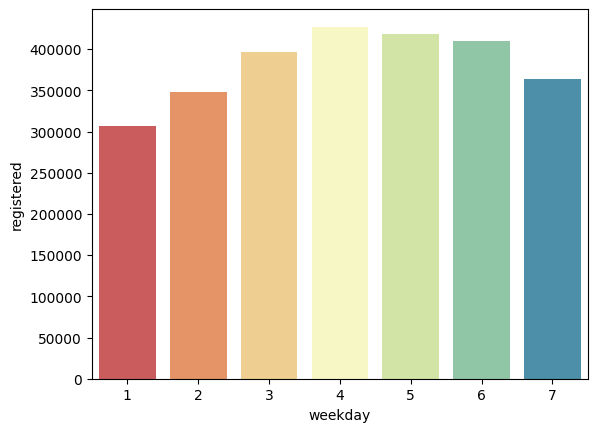

In [32]:
sns.barplot(
        data = semana,
        x = 'weekday',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weekday TIENE ORDEN, por lo que le daremos menor peso a 1(Lunes) y 7(Domingo) y mayor a 4(Jueves) y 5(Viernes).`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [33]:
mapa_weekday = {7:0, 
1:0,
2:1, 
3:2,
4:3, 
5:3,
6:3}

In [34]:
df['weekday'] = df['weekday'].map(mapa_weekday)

---

## WEATHERSIT

In [35]:
clima = df.groupby('weathersit')['registered'].sum()
clima = pd.DataFrame(clima).reset_index()
clima

,weathersit,registered
0,1,1811606
1,2,825313
2,3,33974


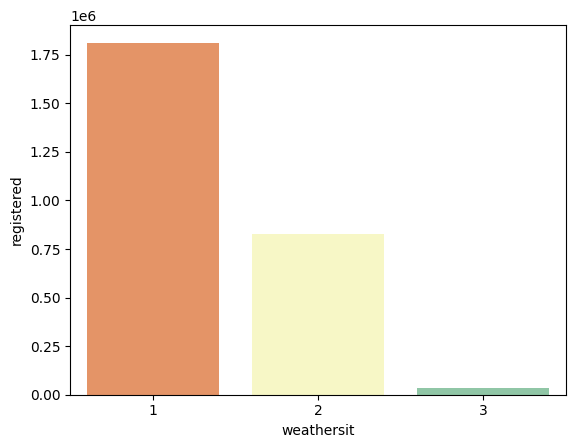

In [36]:
sns.barplot(
        data = clima,
        x = 'weathersit',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

**Concluimos**  `la columna weathersit TIENE ORDEN, por lo que le daremos menor peso a 3  y mayor 1.`

**Método de encoding** ` Vamos a utilizar el metodo .map para codificar esta variable.`

In [37]:
mapa_weather = {3: 0, 2:1, 1:2}

In [38]:
df['weathersit'] = df['weathersit'].map(mapa_weather)

---

# MONTH

In [39]:
month = df.groupby('mnth')['registered'].sum()
month= pd.DataFrame(month).reset_index()
month

,mnth,registered
0,1,122891
1,2,134620
2,3,184476
3,4,208292
4,5,256401
5,6,272436
6,7,266791
7,8,279155
8,9,275668
9,10,262592


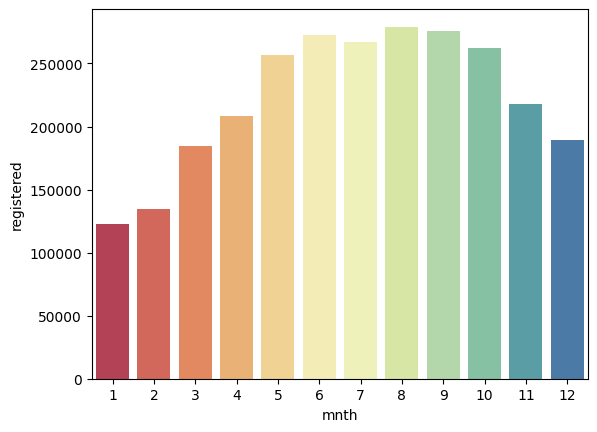

In [40]:
sns.barplot(
        data = month,
        x = 'mnth',
        y = 'registered',
        #alpha = 0.2,
        palette = 'Spectral');

In [43]:
mapa_mes = {1: 0, 2:0, 3:1, 4:1, 5:2, 6:2, 7:2, 8:2, 9:2, 10:2, 11:1, 12:1}


In [44]:
df['mnth'] = df['mnth'].map(mapa_mes)

In [45]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,registered
0,2018-01-01,0,0,0,0,0,1,18.18125,80.5833,10.749882,654
1,2018-01-02,0,0,0,1,1,1,17.68695,69.6087,16.652113,670


In [ ]:
'''def one_hot_encoder_one(df,columna,keep_first=True):
    
    # iniciamos el método de OneHot Encoder
    oh = OneHotEncoder()
    
    # hacemos la codificación de los datos para la variable dada 
    transformados = oh.fit_transform(df[[columna]])
    
    # convertimos nuestro array con la codificación hecha en un dataframe
    oh_df = pd.DataFrame(transformados.toarray())
    
    # el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
    oh_df.columns = oh.get_feature_names_out()
    
    # concatenamos el dataframe original con el dataframe que acabamos de crear
    final = pd.concat([df,oh_df],axis=1)
    
    # eliminamos la columna original 
    final.drop(columna, axis = 1,  inplace = True)
    return final'''


In [ ]:
#df = one_hot_encoder_one(df, "mnth")


In [47]:
df.to_pickle('../datos/registrados/05-registrados_encoding.pickle')

In [48]:
df.to_csv('../datos/registrados/05-registrados_encoding.csv')